In [1]:
import pandas as pd


df_sentences = pd.read_csv("GeneratedSentences.csv")

df_sentences

,Unnamed: 0,English,KeywordVerb,KeywordNoun
0,0,Sieve's 'harm'.,Sieve,Hazard
1,1,Anger is a celebrated song.,Celebrate,Anger
2,2,To wipe's road is a road.,To wipe,road
3,3,Teach is a joy.,Teach,joy
4,4,Come's pan is a dish.,come,pan
...,...,...,...,...
195,195,Feet is a tooth.,Feet,tooth
196,196,To rent out Sweat is a restaurant.,to rent out,Sweat
197,197,"The prayer for a mother is ""belonged"".",pray,mother
198,198,Pride is a lie.,lie,Pride


In [10]:
# Machine Learning

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER
nltk.download('vader_lexicon')

try:
    df_ML
except NameError:
    df_ML = pd.DataFrame(columns=['Text','Sentiment'])


df_ML['Text'] = (df_sentences['English'])[:100]
# Initialise sentiment analyser
sid = SentimentIntensityAnalyzer()

# Inputs texts



# Function to analyze sentiments
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    #print(f"Text: {text}")
    #print(f"Scores: {scores}")
    if scores['compound'] >= 0.05:
        print("Sentiment: Positive")
    elif scores['compound'] <= -0.05:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")
    print("")




# Look to reference code. VADER
def AssignSentiment(text):
        scores = sid.polarity_scores(text)
        print(f"Text: {text}")
        print(f"Scores: {scores}")
        if scores['compound'] >= 0.05:
            return "Positive"
        elif scores['compound'] <= -0.05:
            return "Negative"
        else:
            return "Neutral"



        
        
df_ML['Text']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\magai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0                        Sieve's 'harm'.
1            Anger is a celebrated song.
2              To wipe's road is a road.
3                        Teach is a joy.
4                  Come's pan is a dish.
                     ...                
95              Smile's hair is a Smile.
96                Hunt's lion is a Hunt.
97                To light up's drinker.
98    Abandonment is the leave of leave.
99            To light up was whirlwind.
Name: Text, Length: 100, dtype: object

In [ ]:
df_ML['Sentiment'] = (df_sentences['English'])[:100].apply(AssignSentiment)
df_ML

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing 


lab_encoder = preprocessing.LabelEncoder() 


X = df_ML.drop('Sentiment', axis=1) 
X = lab_encoder.fit_transform(X).reshape(-1, 1)
Y = lab_encoder.fit_transform(y)
results_classes = lab_encoder.classes_
results_dictionairy = dict(zip(range(0, len(lab_encoder.classes_)),results_classes ))
y = df_ML['Sentiment']
#print(y)
#print(X)

X

#X_train, X_test, y_train, y_test = train_test_split(df_Feature, df_target, train_size = 0.8, random_state = 42)

#X = df2.iloc[:, :-1] #This line selects all rows and all columns of the DataFrame df2 except for the last column. 
#It's assuming that the last column contains the target variable or labels, and X will contain all the feature columns

#y = df2.iloc[:, -1]  # This line selects all rows but only the last column of the DataFrame df2. 
#This is to isolate the target variable or labels, and y will contain these labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)



C:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Random Forest :  0.65
Classification report of Random Forest : 
               precision    recall  f1-score   support

    Negative       0.33      0.67      0.44         3
     Neutral       0.77      0.77      0.77        13
    Positive       1.00      0.25      0.40         4

    accuracy                           0.65        20
   macro avg       0.70      0.56      0.54        20
weighted avg       0.75      0.65      0.65        20

Confusion Matrix of Random Forest : 
 [[ 2  1  0]
 [ 3 10  0]
 [ 1  2  1]]


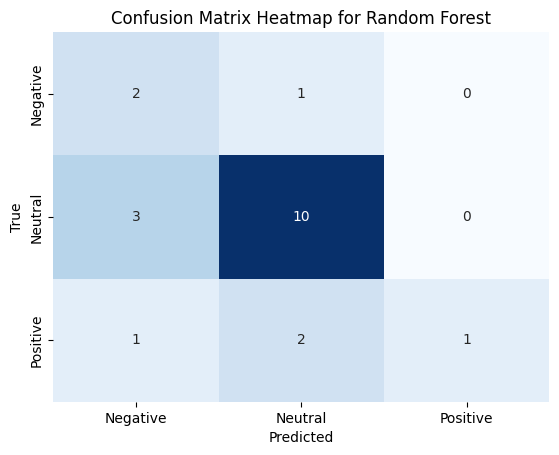

['Negative', 'Neutral', 'Positive']
pres score: 0.750000


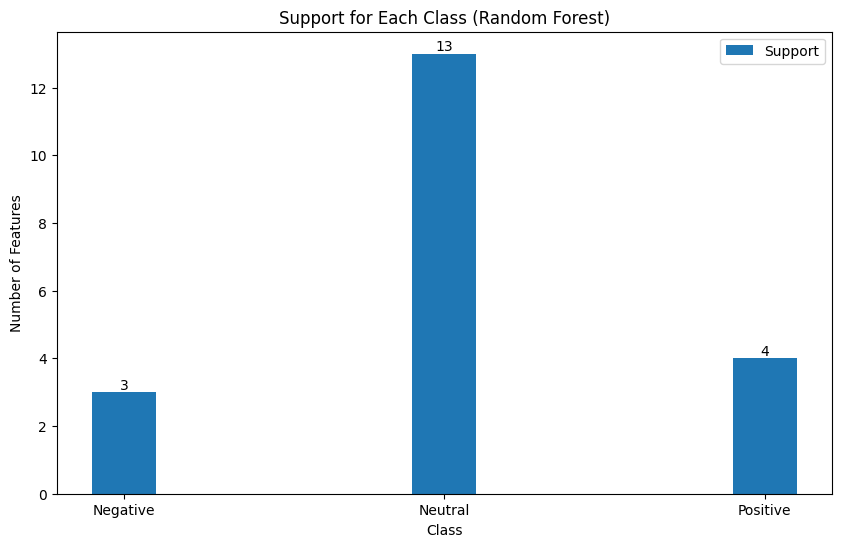

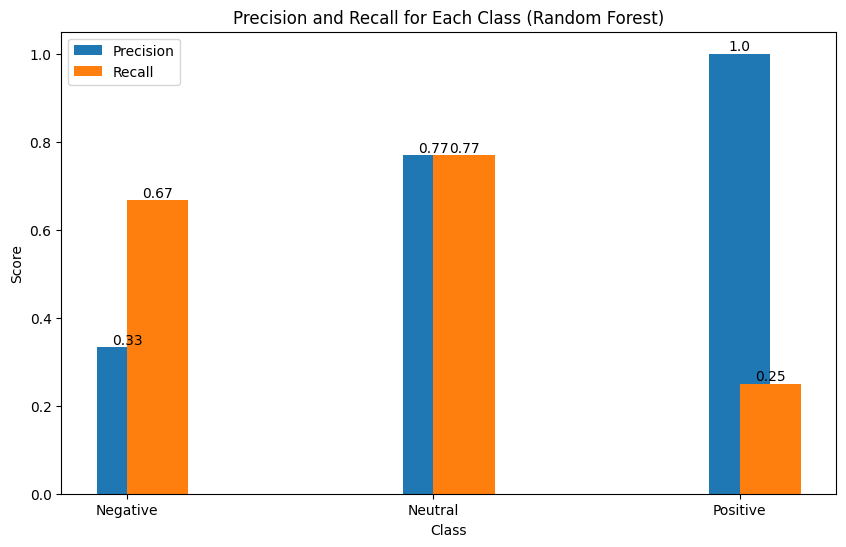

In [28]:


rf = RandomForestClassifier(n_estimators=100, random_state=42) #  It specifies the number of trees in the Random Forest. 
#In this case, there are 100 trees in the forest

# random_state: This parameter is used to set the random seed for reproducibility. 
#By setting it to 42, the randomization process will be the same each time the code is run,
#ensuring consistent results for the Random Forest model.

rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)

rf_y_pred_proba = rf.predict_proba(X_test)[:, 1]

#This code snippet uses the trained Random Forest classifier (rf) to make predictions on the test data (X_test). 
#The predict method takes the test features in X_test as input and produces predicted labels for these features. 
#The predictions are stored in the rf_pred variable, which can be used for further evaluation or analysis to assess how well 
#the model performs on unseen data. These prediction values will be compared to y_test values to validate how well the model performs.



rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)

results_mapping = dict(zip(results_classes, range(0, len(lab_encoder.classes_)))) ## Should save this in its own variable.
results_dictionairy = dict(zip(range(0, len(lab_encoder.classes_)),results_classes ))
#print(mapping)
#print(dictionairy)
graph_Labels = results_dictionairy[0], results_dictionairy[1],results_dictionairy[2]
sns.heatmap(rf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=graph_Labels, yticklabels=graph_Labels) #fmt = string?
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Random Forest")
plt.show()

rf_report = classification_report(rf_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary. Important to get labels as ints not strings.
labels = [str(label) for label in np.unique(np.concatenate((rf_pred, y_test)))]  # Get all unique labels
print(labels)
rf_support = [rf_report[label]['support'] if label in rf_report else 0 for label in labels] 
rf_precision = [rf_report[label]['precision'] if label in rf_report else 0.0 for label in labels]
rf_recall = [rf_report[label]['recall'] if label in rf_report else 0.0 for label in labels] 
rf_f1 = [rf_report[label]['f1-score'] if label in rf_report else 0.0 for label in labels]
rf_precisionScore = precision_score(rf_pred, y_test,average='weighted')
rf_recallScore = recall_score(rf_pred, y_test,average='weighted')
rf_f1Score = f1_score(rf_pred, y_test,average='weighted')
print('pres score: %f' % rf_precisionScore)

plt.figure(figsize=(10, 6))
support = plt.bar(graph_Labels, rf_support, width=0.2, label='Support', align='center')

for p in support.patches: # Investigate later
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.xticks(graph_Labels)
plt.legend()
plt.title('Support for Each Class (Random Forest)')
plt.show()



#print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
#print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))

# Plot precision and recall
plt.figure(figsize=(10, 6))
precisions = plt.bar(graph_Labels, rf_precision, width=0.2, label='Precision', align='center')

for p in precisions.patches: # Investigate later
    plt.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Check formatting how many decimals.


recalls = plt.bar(graph_Labels, rf_recall, width=0.2, label='Recall', align='edge')

for p in recalls.patches: #Investigate later
    plt.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

#for i, v in enumerate(Precisions):
#    plt.text(i+0.4, v+ 0.02, str(round(v,3)), color='blue', fontweight='bold', verticalalignment='center',horizontalalignment='center')

#for i, v in enumerate(Recalls):
  #  plt.text(i+0.4, v+ 0.02, str(round(v,3)), color='blue', fontweight='bold', verticalalignment='center',horizontalalignment='center')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(graph_Labels)
plt.legend()
plt.title('Precision and Recall for Each Class (Random Forest)')
plt.show()

# Annotations on classes?..?



#The accuracy_score function from scikit-learn is used to calculate the accuracy of the model's predictions (rf_pred) 
#compared to the actual labels (y_test). This score measures the proportion of correctly classified instances.
#classification_report: The classification_report function generates a comprehensive report that includes precision, recall, 
#F1-score, and support for each class in the classification problem. It provides detailed insights into the model's 
#performance for different classes.
#confusion_matrix: The confusion_matrix function computes a confusion matrix that summarizes the true positive, true negative, 
#false positive, and false negative counts for the classification results. It helps in understanding how well the model is 
#performing and where it might be making errors.

#Finally, the code prints out the accuracy, classification report, and confusion matrix for the Random Forest model, 
#allowing you to evaluate its performance on the test data.




C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Reca

Accuracy of SVM :  0.65
Classification report of SVM : 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       1.00      0.65      0.79        20
    Positive       0.00      0.00      0.00         0

    accuracy                           0.65        20
   macro avg       0.33      0.22      0.26        20
weighted avg       1.00      0.65      0.79        20

Confusion Matrix of SVM :
 [[ 0  0  0]
 [ 6 13  1]
 [ 0  0  0]]
['Negative', 'Neutral', 'Positive']
pres score: 1.000000


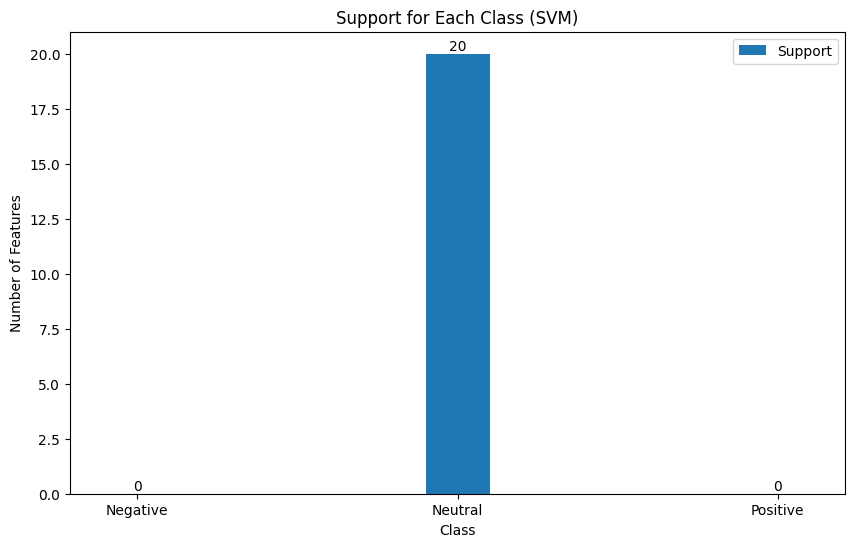

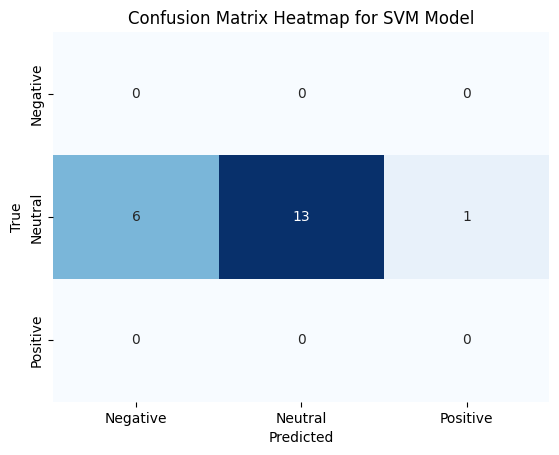

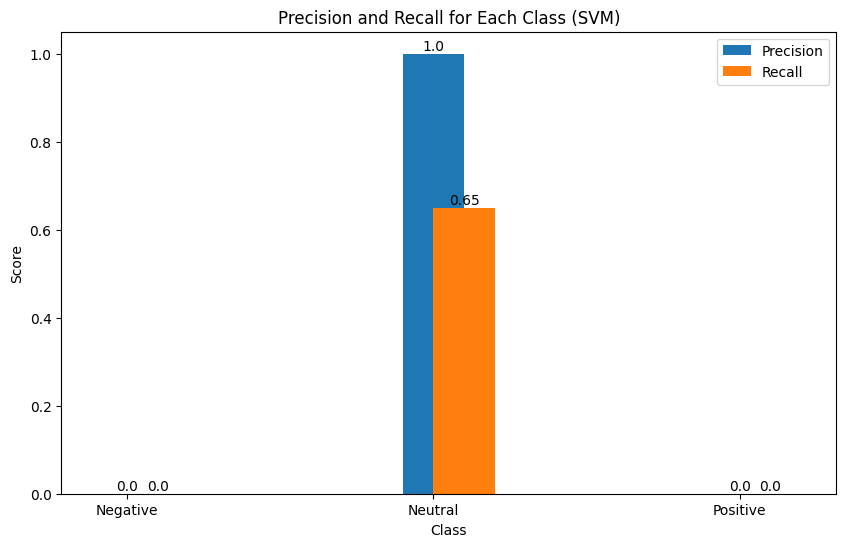

In [29]:
from sklearn.calibration import CalibratedClassifierCV
svr = LinearSVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)


#a Support Vector Machine (SVM) classifier with a linear kernel (LinearSVC) is trained and tested using the following steps:

#svr = LinearSVC(): An instance of the LinearSVC classifier is created.

#svr.fit(X_train, y_train): The LinearSVC classifier is trained on the training data (X_train and y_train). 
#This step involves finding the hyperplane that best separates the data points of different classes while maximizing the margin
#between them.

#svr_pred = svr.predict(X_test): The trained SVM classifier is used to make predictions on the test data (X_test). 
#These predictions are stored in the svr_pred variable.




svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)
  # Use output_dict=True to get metrics as a dictionary. Important to get labels as ints not strings.

print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svr_matrix)

svr_report = classification_report(svr_pred, y_test, output_dict=True)
labels = [str(label) for label in np.unique(np.concatenate((svr_pred, y_test)))]  # Get all unique labels
print(labels)
svr_support = [svr_report[label]['support'] if label in svr_report else 0 for label in labels] 
svr_precision = [svr_report[label]['precision'] if label in svr_report else 0.0 for label in labels]
svr_recall = [svr_report[label]['recall'] if label in svr_report else 0.0 for label in labels]
svr_f1 = [svr_report[label]['f1-score'] if label in svr_report else 0.0 for label in labels]
svr_precisionScore = precision_score(svr_pred, y_test,average='weighted')
svr_recallScore = recall_score(svr_pred, y_test,average='weighted')
svr_f1Score = f1_score(svr_pred, y_test,average='weighted')
print('pres score: %f' % svr_precisionScore)

results_mapping = dict(zip(results_classes, range(0, len(lab_encoder.classes_)))) ## Should save this in its own variable.
results_dictionairy = dict(zip(range(0, len(lab_encoder.classes_)),results_classes ))
#print(mapping)
#print(dictionairy)
graph_Labels = results_dictionairy[0], results_dictionairy[1],results_dictionairy[2]

plt.figure(figsize=(10, 6))
support = plt.bar(graph_Labels, svr_support, width=0.2, label='Support', align='center')

for p in support.patches: # Investigate later
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.xticks(graph_Labels)
plt.legend()
plt.title('Support for Each Class (SVM)')
plt.show()

sns.heatmap(svr_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels= graph_Labels, yticklabels= graph_Labels) #fmt = string?
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for SVM Model")
plt.show()
#print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
#print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))

# Plot precision and recall
plt.figure(figsize=(10, 6))
precisions = plt.bar(graph_Labels, svr_precision, width=0.2, label='Precision', align='center')

for p in precisions.patches: # Investigate later
    plt.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


recalls = plt.bar(graph_Labels, svr_recall, width=0.2, label='Recall', align='edge')

for p in recalls.patches: #Investigate later
    plt.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(graph_Labels)
plt.legend()
plt.title('Precision and Recall for Each Class (SVM)')
plt.show()

clf = CalibratedClassifierCV(svr) # ref https://stackoverflow.com/questions/26478000/converting-linearsvcs-decision-function-to-probabilities-scikit-learn-python
clf.fit(X_train, y_train)
svr_y_pred_proba = clf.predict_proba(X_test)[:, 1]


#svr_accuracy = accuracy_score(svr_pred, y_test): The accuracy of the SVM classifier's predictions on the test data (svr_pred) 
#is calculated by comparing them to the true labels (y_test). The result is stored in the svr_accuracy variable.

#svr_report = classification_report(svr_pred, y_test): The classification_report function is used to generate a detailed 
#classification report, including metrics such as precision, recall, F1-score, and support for each class. 
#This report is stored in the svr_report variable.

#svr_matrix = confusion_matrix(svr_pred, y_test): The confusion matrix is computed based on the predictions (svr_pred) and 
#true labels (y_test). The confusion matrix provides information about the number of true positive, true negative, 
#false positive, and false negative predictions. It is stored in the svr_matrix variable.

#Finally, the results are printed using print statements:

#The accuracy of the SVM classifier is printed with a rounded value.
#The classification report, which includes precision, recall, F1-score, and support for each class, is printed.
#The confusion matrix, which shows the distribution of true and false predictions, is printed.
#These metrics help evaluate the performance of the SVM classifier in terms of its ability to correctly classify data points into different classes.

In [ ]:
#Naive Bayes Algorithm

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_y_pred_proba = nb.predict_proba(X_test)[:, 1]

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)




# Assuming you already have nb_pred and y_test defined

nb_Accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
#nb_Accuracy = round(eb_accuracy, 3)
print('Accuracy of Naive Bayes : ', nb_Accuracy)
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)


results_mapping = dict(zip(results_classes, range(0, len(lab_encoder.classes_)))) ## Should save this in its own variable.
results_dictionairy = dict(zip(range(0, len(lab_encoder.classes_)),results_classes ))
#print(mapping)
#print(dictionairy)
graph_Labels = results_dictionairy[0], results_dictionairy[1],results_dictionairy[2]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=graph_Labels, yticklabels=graph_Labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Naive bayes")
plt.show()

# Extract support for all classes
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary. Important to get labels as ints not strings.
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
print(labels)
# This gets for all labels in the nb_report array the support
#metric
nb_support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels] 
nb_precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
nb_recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]
nb_f1 = [nb_report[label]['f1-score'] if label in nb_report else 0.0 for label in labels]
nb_precisionScore = precision_score(nb_pred, y_test,average='weighted')
nb_recallScore = recall_score(nb_pred, y_test,average='weighted')
nb_f1Score = f1_score(nb_pred, y_test,average='weighted')
print('pres score: %f' % nb_precisionScore)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)



# Plot support
plt.figure(figsize=(10, 6))
support = plt.bar(graph_Labels, nb_support, width=0.2, label='Support', align='center')

for p in support.patches: # Investigate later
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.xticks(graph_Labels)
plt.legend()
plt.title('Support for Each Class (Naive Bayes)')
plt.show()



print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))

# Plot precision and recall
plt.figure(figsize=(10, 6))
precisions = plt.bar(graph_Labels, nb_precision, width=0.2, label='Precision', align='center')

for p in precisions.patches: # Investigate later
    plt.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

recalls = plt.bar(graph_Labels, nb_recall, width=0.2, label='Recall', align='edge')

for p in recalls.patches: #Investigate later
    plt.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(graph_Labels)
plt.legend()
plt.title('Precision and Recall for Each Class (Naive Bayes)')
plt.show()



In [88]:
#https://github.com/abhi227070/Emotion-Detection-of-text-using-LSTM-Internship-Project/blob/main/Emotion%20Classification%20Major%20Project%20.ipynb
## Perfoming the text preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

import nltk
import re

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences,to_categorical
from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN,LSTM,GRU,Bidirectional

X = df_ML.drop('Sentiment', axis=1) 
#X = lab_encoder.fit_transform(X).reshape(-1, 1)
#Y = lab_encoder.fit_transform(y)
results_classes = lab_encoder.classes_
results_dictionairy = dict(zip(range(0, len(lab_encoder.classes_)),results_classes ))
y = df_ML['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

nltk.download('stopwords')  # Downloading all the stopwords from the nltk library
pattern = re.compile('<.*?>')  # Pattern for removing the HTML tags
punctuation = string.punctuation   # Extracting all punctuation from the string library
ps = PorterStemmer()  # Creating a PorterStemmer object for the stemming purpose
tokenizer = Tokenizer() # Creating a Tokenizer object for representing the text into numeric form

def text_preprocess(text):

  text = re.sub(pattern,'',text)  # Removing the HTML tags using re library

  text = text.lower()  # Lower case all the character present in the text

  text = text.translate(str.maketrans('','',punctuation))   # Removing all the punctuation from the text

  text = text.split()    # word tokenize the text

  text = [ps.stem(word) for word in text if word not in stopwords.words('english')]  # Removing the stopwords from the text and stem each word

  return ' '.join(text)
X_train

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text
55,Accepted Water is a water option.
88,"The satiate ""hours"" was written."
26,"""To carry"" is a muster."
42,The trust for trust is fear.
69,"The song ""single rabbit"" is titled ""singer""."
...,...
60,To roll was foufou.
71,To kiss is Impossible.
14,"Come's Thread is a ""comer""."
92,The take of the picture is quiet.


In [89]:
# processed_train_data = [text_preprocess(words) for words in train_sentences]   # Applying the text pre-processing fuction to the text column of train dataset
# #processed_validation_data = [text_preprocess(words) for words in test_sentences]  # Applying the text pre-processing fuction to the text column of validation dataset
# processed_test_data = [text_preprocess(words) for words in test_sentences]   # Applying the text pre-processing fuction to the text column of test dataset
# #print(processed_train_data)
import numpy as np
processed_train_data = [text_preprocess(words) for words in X_train['Text']]   # Applying the text pre-processing fuction to the text column of train dataset
#processed_validation_data = [text_preprocess(words) for words in test_sentences]  # Applying the text pre-processing fuction to the text column of validation dataset
processed_test_data = [text_preprocess(words) for words in X_test['Text']]   # Applying the text pre-processing fuction to the text column of test dataset
#print(processed_train_data)




In [90]:
# Putting all the processed text of train data into a whole text. Then fit this whole text into the tokenizer for word embedding.

whole_text = ''

for i in processed_train_data:
    print(i)
    whole_text = whole_text + i


tokenizer.fit_on_texts([whole_text])
print(len(tokenizer.word_index))   # Printing the vocab size or the number of words present in the train data text. This is used as hyperparameter for the embedding layer.
#print(whole_text) # used as hyperparameter
vocab_size = len(tokenizer.word_index)

accept water water option
satiat hour written
carri muster
trust trust fear
song singl rabbit titl singer
exit car
leav punish
hunt lion hunt
talk rich book
announc miseri dish
return car return vehicl
suffer
miss misss knee miss
tilt power tilt
shake quiet place
rent out carri
feet drink favorit
rent cup
walk song dowri
babouch ask babouch
observ month
heart studi
smile smile
smile hair smile
transform thief
receiv goat recipi
touch differ
shake foot shake
succeed puls key ingredi
struck bibl book
resum chair
teach joy
smile villag
struck monkey
ask women question
creat countri origin
shake chair shake
teach song
disappear
hunt mother born
propag word begin
light whirlwind
last one visit rain
admir eagl admir
hunt cup hunt
begin perfect
play attent play
prayer belong lie
sing joy
light up drinker
swear appear
cradl
welcom rabbit
regret popular dish
abandon leav leav
cross parent
announc cupboard avail
sing intellig
grow grow
listen skeleton song
kill comet song
add variat ad
letter tr

In [91]:
# In this cell the train processed texts are converted into respective numeric sequences which are further padded to have equal sizes.
from sklearn import preprocessing 
x_train_sequences = []

for i in processed_train_data:
  x_train_sequences.append(tokenizer.texts_to_sequences([i])[0])  # Each processed text is converted into sequences 


x_train_padseq = pad_sequences(x_train_sequences,maxlen = 50, padding = 'post')  # Each sequences are padded to have equal size.
lab_encoder = preprocessing.LabelEncoder()                     # transformation of categorical to numeric
train_labels_encode = lab_encoder.fit_transform(y_train)
#print(train_labels)
mapping = dict(zip(lab_encoder.classes_, range(0, len(lab_encoder.classes_))))
# Check if machine learning done right...
print(mapping)
DL_x_train = np.array(x_train_padseq)
DL_y_train = np.array(to_categorical(train_labels_encode))

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [92]:

x_test_sequences = []

for i in processed_test_data:
  x_test_sequences.append(tokenizer.texts_to_sequences([i])[0])     # Each processed text is converted into sequences


x_test_padseq = pad_sequences(x_test_sequences,maxlen = 50, padding = 'post')    # Each sequences are padded to have equal size.
lab_encoder = preprocessing.LabelEncoder()  
test_labels_encode = lab_encoder.fit_transform(y_test)
mapping = dict(zip(lab_encoder.classes_, range(0, len(lab_encoder.classes_))))
# Check if machine learning done right...
print(mapping)
DL_x_test = np.array(x_test_padseq)
DL_y_test = np.array(test_labels_encode)

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [97]:
#https://github.com/abhi227070/Emotion-Detection-of-text-using-LSTM-Internship-Project/blob/main/Emotion%20Classification%20Major%20Project%20.ipynb
vocab_size = vocab_size   # vocabulary size of the tokenizer
dim = 500          # Number of dense vector dimension required for the output
sent_length = 50    # The length of each sequence

## Bidirectional LSTM model

bidirectional_lstm_model = Sequential()

bidirectional_lstm_model.add(Embedding(vocab_size,output_dim=50))
bidirectional_lstm_model.add(Bidirectional(LSTM(20)))
bidirectional_lstm_model.add(Dense(3,activation = 'softmax'))

bidirectional_lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

bidirectional_lstm_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
import tensorflow as tf

#data_list = tf.stack(data_list)

print(DL_x_train.shape)
print(DL_y_train.shape)

bidirectional_lstm_model_fitted = bidirectional_lstm_model.fit(x = DL_x_train, y = DL_y_train, epochs = 5)
LSTM_predict = bidirectional_lstm_model.predict(DL_x_test)



#https://www.w3schools.com/python/python_ml_confusion_matrix.asp
bilstm_prediction = np.array([np.argmax(x) for x in LSTM_predict])
#print(y_pred_bilstm)
lstm_matrix = confusion_matrix(DL_y_test, bilstm_prediction) # Maybe change variable name
print(lstm_matrix)
sns.heatmap(lstm_matrix, annot=True,fmt='g',xticklabels=lab_encoder.classes_, yticklabels=lab_encoder.classes_)
#plt.set_ticklabels(lab_encoder.classes_)
#ax.yaxis.set_ticklabels(lab_encoder.classes_);
plt.title('Confusion Matrix For BILSTM (Large Dataset)')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
len(y_test)


(80, 50)
(80, 3)
Epoch 1/5
1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2188 - loss: 1.1115

InvalidArgumentError: Graph execution error:

Detected at node sequential_14_1/embedding_12_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\magai\AppData\Local\Temp\ipykernel_14032\1647254057.py", line 8, in <module>

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\models\sequential.py", line 212, in call

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py", line 175, in call

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py", line 560, in call

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py", line 140, in call

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\numpy.py", line 4918, in take

  File "C:\Users\magai\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\numpy.py", line 1967, in take

indices[20,1] = 129 is not in [0, 129)
	 [[{{node sequential_14_1/embedding_12_1/GatherV2}}]] [Op:__inference_one_step_on_iterator_41113]